In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
df = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')

In [5]:
df = df[['TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'\
,'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED']]

In [8]:
pd.unique(df['NAME_EDUCATION_TYPE'])
pd.unique(df['NAME_HOUSING_TYPE'])

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [9]:
df = pd.get_dummies(df)

In [13]:
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['TARGET']).fillna(0)
y = df['TARGET'].fillna(0)
clf = LogisticRegression(random_state=0).fit(X, y)

In [27]:
clf.predict_proba(X)
#clf.predict(X).sum()
y_pred = (clf.predict_proba(X)[:,0]<.85)

In [33]:
#y_pred.sum()
#y.sum()
TP = ((y==1)&(y_pred==1)).sum()
TN = ((y==0)&(y_pred==0)).sum()
FP = ((y==0)&(y_pred==1)).sum()
FN = ((y==1)&(y_pred==0)).sum()
print(np.array([[TN,FP],[FN,TP]]))
print(TP/(FN+TP))
P = (y==1).sum()
N = (y==0).sum()
print(P/(P+N))

[[254774  27912]
 [ 21023   3802]]
0.15315206445115812


0.9192711805431351

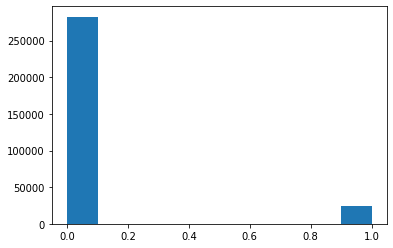

In [19]:
import matplotlib.pyplot as plt
plt.hist(y)
(y==0).sum()/len(y)